In [3]:
# Atividade Prática – EDA e Viz do Campeonato Brasileiro

## Análise de Jogos de Futebol 

#### Objetivo: Analisar os dados do Campeonato Brasileiro e outros (8.453 jogos, 2003-2024) para extrair insights que orientem decisões sobre clubes e jogos

## 1. Estatísticas Descritivas e Visualizações Básicas

- 1. Distribuição de gols:
- 2. Mando de campo
- 3. Público
- 4. Respostas

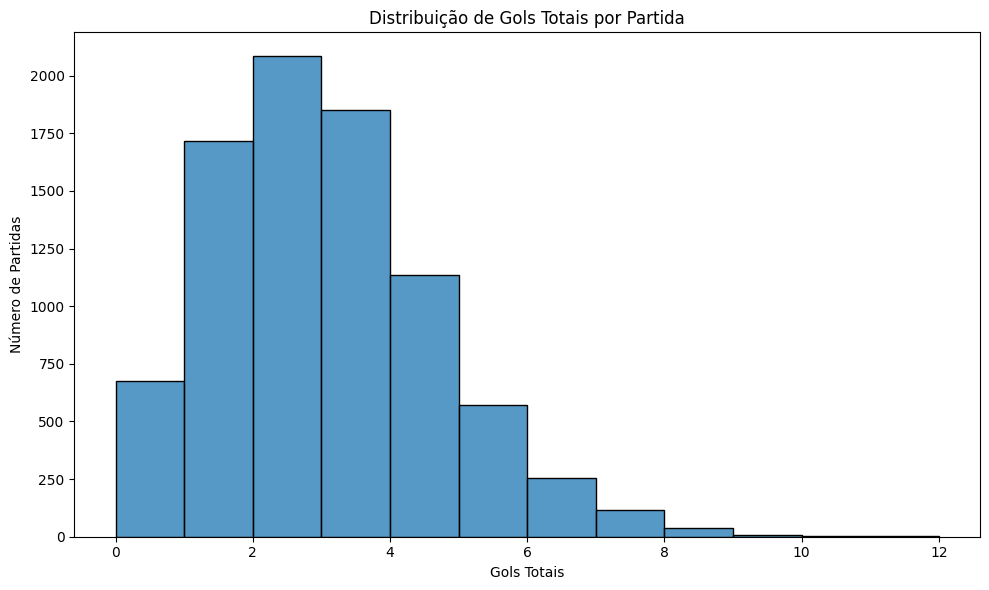

In [ ]:
# 1.1 Carregamento do arquivo CSV
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.patheffects as path_effects

df = pd.read_csv('futebol.csv')
# TODO: Crie coluna gols_total = gols_mandante + gols_visitante

df['gols_total'] = df['gols_mandante'] + df['gols_visitante']

# TODO: Histograma da distribuição de gols totais

plt.figure(figsize=(10, 6))
sns.histplot(df['gols_total'], bins=range(0, int(df['gols_total'].max()) + 2), kde=False)
plt.title('Distribuição de Gols Totais por Partida')
plt.xlabel('Gols Totais')
plt.ylabel('Número de Partidas')
plt.tight_layout()
plt.show()

# TODO: Calcule: média, mediana, moda, desvio padrão, IQR
media_gols = df['gols_total'].mean()
mediana_gols = df['gols_total'].median()
moda_gols = df['gols_total'].mode()[0]
desvio_padrao_gols = df['gols_total'].std()
iqr_gols = stats.iqr(df['gols_total'])

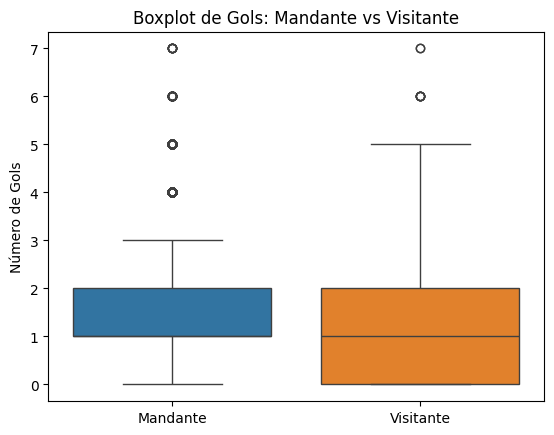

Comparação - Gols Mandante vs Visitante
Média Mandante: 1.53
Mediana Mandante: 1.0
Moda Mandante: 1.0

Média Visitante: 1.02
Mediana Visitante: 1.0
Moda Visitante: 0.0



In [2]:
# 1.2 Mando de campo
# TODO: Boxplots: gols mandante vs visitante
sns.boxplot(data=df[['gols_mandante', 'gols_visitante']])
plt.title('Boxplot de Gols: Mandante vs Visitante') 
plt.ylabel('Número de Gols')
plt.xticks([0, 1], ['Mandante', 'Visitante'])
plt.show()
# TODO: Identifique e interprete outliers

# Mandante: valores acima de 3 gols são considerados outliers, ou seja,
# partidas com 4, 5, 6 e até 7 gols do mandante são eventos raros em relação à maioria dos jogos
# Visitante: valores acima de 5 gols são considerados outliers,
# dá pra interpretar que é mais comum os visitantes marcarem mais de 3 gols em comparação com os mandantes,
# e que goleadas com mais de 5 gols são eventos raros em relação à maioria dos jogos

# TODO: Compare medidas de tendência central
media_mandante = df['gols_mandante'].mean()
mediana_mandante = df['gols_mandante'].median()
moda_mandante = df['gols_mandante'].mode()[0]
media_visitante = df['gols_visitante'].mean()
mediana_visitante = df['gols_visitante'].median()
moda_visitante = df['gols_visitante'].mode()[0]

print("Comparação - Gols Mandante vs Visitante")

print(f"Média Mandante: {media_mandante:.2f}")
print(f"Mediana Mandante: {mediana_mandante}")
print(f"Moda Mandante: {moda_mandante}\n")

print(f"Média Visitante: {media_visitante:.2f}")
print(f"Mediana Visitante: {mediana_visitante}")
print(f"Moda Visitante: {moda_visitante}\n")



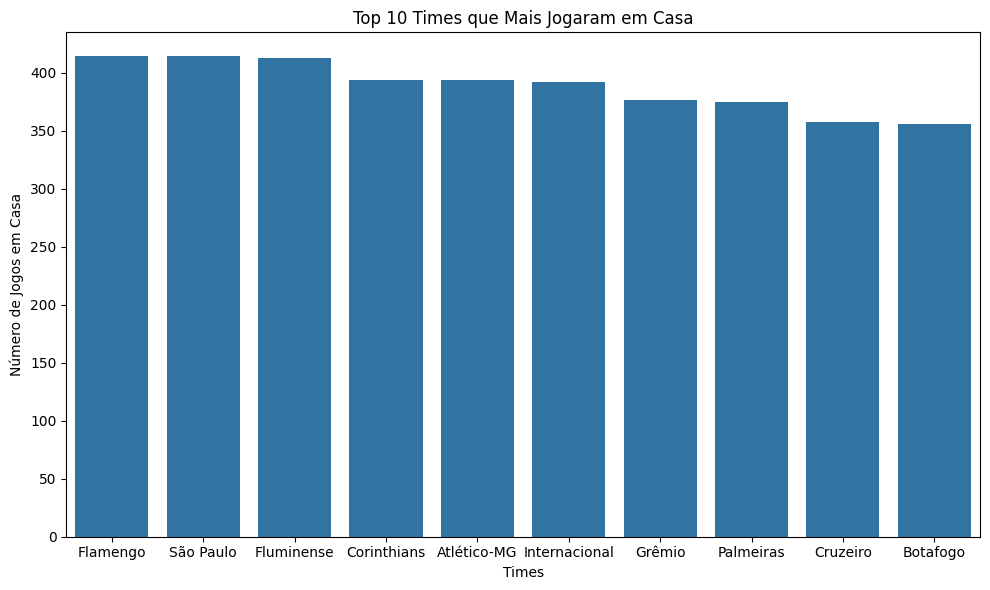

count     6742.000000
mean     16189.951943
std      14074.412391
min          0.000000
25%       5898.250000
50%      12685.500000
75%      22963.250000
max      82044.000000
Name: publico, dtype: float64


C:\Users\Artur\AppData\Local\Temp\ipykernel_3600\3892291696.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_gols_por_faixa = df.groupby('faixa_publico')['gols_total'].mean().reset_index()


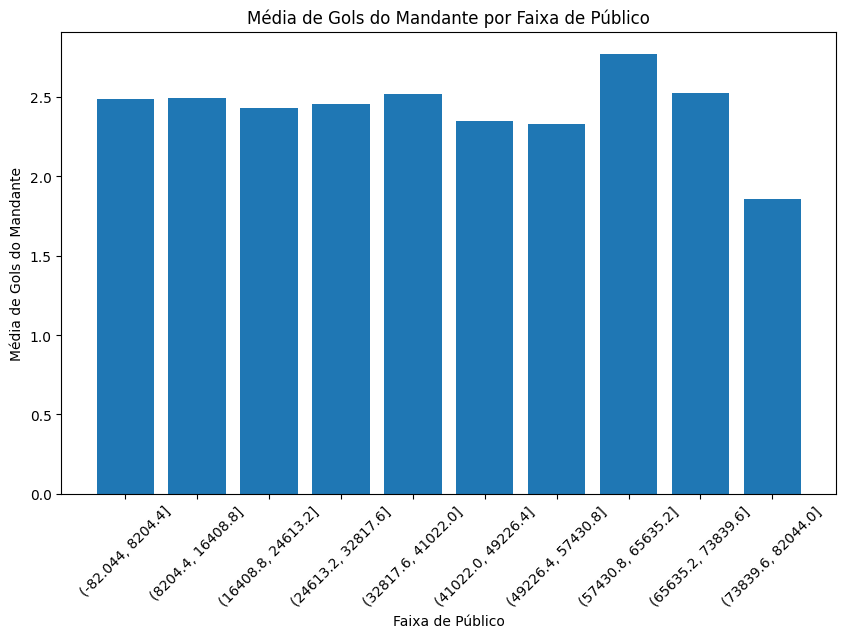

In [3]:
# 1.3 Público
# TODO: Gráfico de barras: 10 times que mais jogaram em casa
top_10_times = df['time_mandante'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_times.index, y=top_10_times.values)
plt.title('Top 10 Times que Mais Jogaram em Casa')
plt.xlabel('Times')
plt.ylabel('Número de Jogos em Casa')
plt.tight_layout()
plt.show()

# TODO: Estatísticas descritivas do público (dados não-nulos)
publico_stats = df['publico'].dropna().describe()
print(publico_stats)

# Criar faixas de público
df['faixa_publico'] = pd.cut(df['publico'], bins=10)
# Contar média de gols por faixa de público
media_gols_por_faixa = df.groupby('faixa_publico')['gols_total'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(media_gols_por_faixa['faixa_publico'].astype(str), media_gols_por_faixa['gols_total'])
plt.xticks(rotation=45)
plt.title('Média de Gols do Mandante por Faixa de Público')
plt.xlabel('Faixa de Público')
plt.ylabel('Média de Gols do Mandante')
plt.show()

# Respostas

• A distribuição de gols é simétrica ou assimétrica? O que isso indica?

R: Assimétrico com base na diferença entre a Média, Moda e Mediana

• Há vantagem numérica do mando de campo?

R:Sim, há em média um aumento de 50%

• Qual a relação entre público e gols?

R: A pressão de jogos maiores tais como Derby's faz com que a média de gols seja menor

## 1.2 Teste de Hipótese

### Contexto: Quantificar estatisticamente se a “vantagem do mando de campo” existe.
As hipóteses:

• H0: μmandante = μvisitante (sem diferença)

• H1: μmandante > μvisitante (mandantes marcam mais)

In [12]:
#Execute teste t:
# Use scipy.stats.ttest_ind()
# Nível de significância: α = 0,05
# Calcule e interprete valor-p
gols_mandante = df['gols_mandante'].dropna()
gols_visitante = df['gols_visitante'].dropna()
t_stat, p_valor = ttest_ind(gols_mandante, gols_visitante)
print("Estatística t:", t_stat)
print("Valor-p :", p_valor)
if t_stat > 0:
    p_valor_unicaudal = p_valor / 2
else:
    p_valor_unicaudal = 1 - (p_valor / 2)
print("Valor-p (unicaudal):", p_valor_unicaudal)

alpha = 0.05
if p_valor_unicaudal < alpha:
    print("Rejeita H0 = mandantes marcam mais gols")
else:
    print("Não rejeita H0 = não há evidência suficiente de vantagem do mando")

Estatística t: 29.189561129282634
Valor-p : 8.772428607979118e-183
Valor-p (unicaudal): 4.386214303989559e-183
Rejeita H0 = mandantes marcam mais gols


Diferença das médias: 0.5050875532418362 gols por jogo
Média mandante: 1.5281590156176053
Média visitante: 1.023071462375769


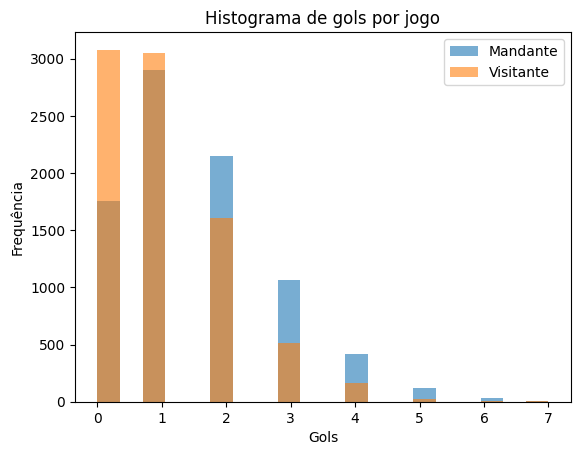

In [10]:
#Analise resultados: 
# Tamanho do efeito (diferença das médias)
diferenca_media = gols_mandante.mean() - gols_visitante.mean()
print("Diferença das médias:", diferenca_media, "gols por jogo")

# Significância estatística vs relevância prática
print("Média mandante:", gols_mandante.mean())
print("Média visitante:", gols_visitante.mean())
# os mandantes marcam, em média, meio gol a mais por partida, sendo assim, tem vantagem de jogar em casa,
# mas não é exagerada

# Visualização ilustrando o resultado


plt.hist(gols_mandante, bins=20, alpha=0.6, label="Mandante")
plt.hist(gols_visitante, bins=20, alpha=0.6, label="Visitante")
plt.title("Histograma de gols por jogo")
plt.xlabel("Gols")
plt.ylabel("Frequência")
plt.legend()
plt.show()

O valor-p permite rejeitar H0?
Sim

Qual a diferença prática em gols?
A diferença média entre mandantes e visitantes é aproximadamente 0,505 gols por jogo. Isso significa que um time jogando em casa marca, em média, meio gol a mais por partida do que o time visitante

O resultado é significativo E relevante?
É significativo porque o valor-p é baixo, e uma diferença de 0,5 gols por jogo é relevante no futebol, onde partidas são decididas por 1 gol


## 1.3 Investigação Livre + Pitch


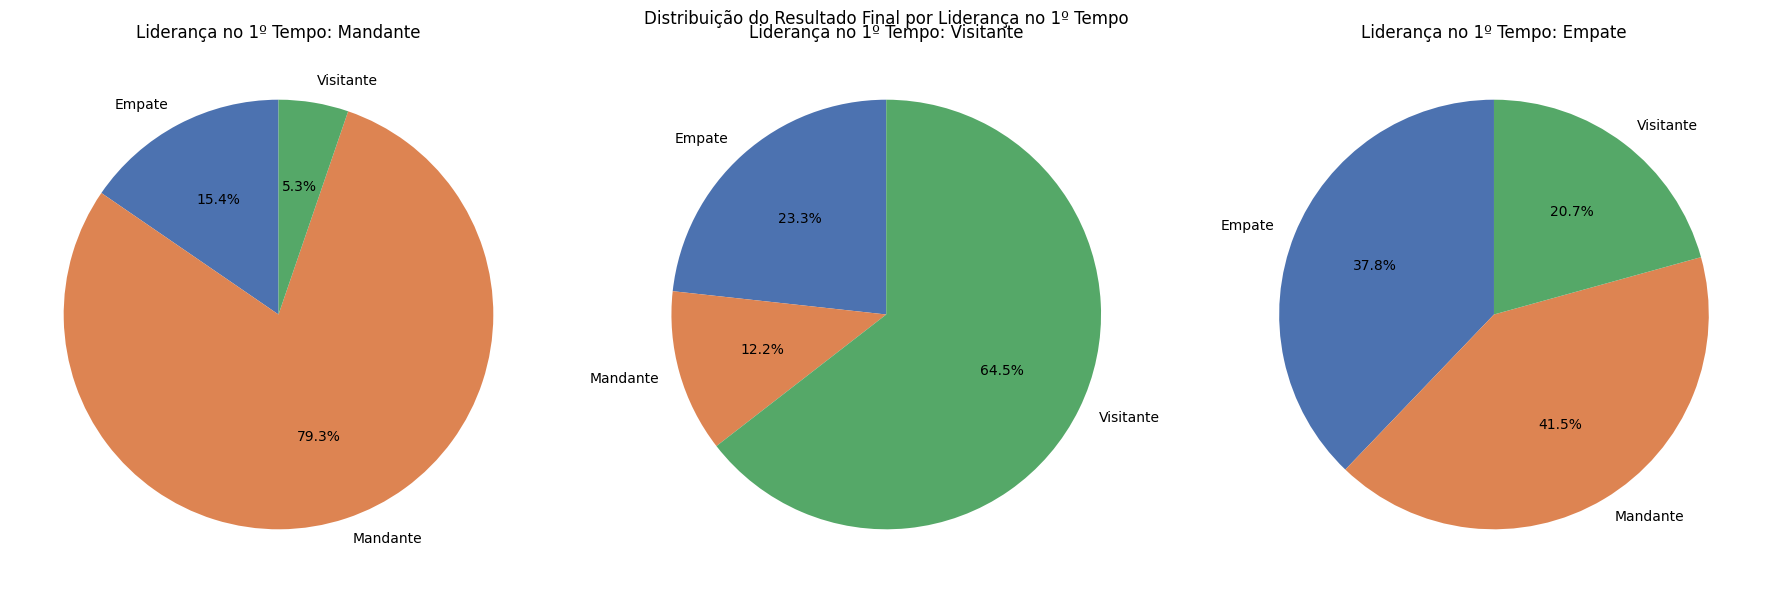

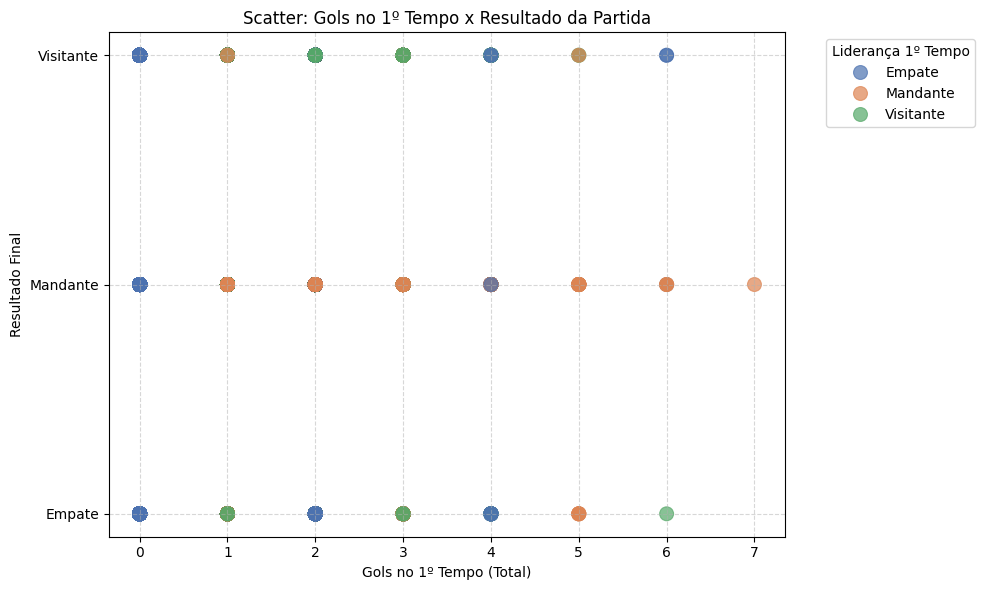

In [20]:
# Filtrar apenas jogos com dados completos
df_validos = df.dropna(subset=['gols_1_tempo_mandante',
                               'gols_1_tempo_visitante',
                               'gols_mandante',
                               'gols_visitante']).copy()

# Converter colunas de gols para numérico
df_validos['gols_1_tempo_mandante'] = pd.to_numeric(df_validos['gols_1_tempo_mandante'], errors='coerce')
df_validos['gols_1_tempo_visitante'] = pd.to_numeric(df_validos['gols_1_tempo_visitante'], errors='coerce')

# Criar coluna de total do 1º tempo
df_validos['gols_total_1_tempo'] = df_validos['gols_1_tempo_mandante'] + df_validos['gols_1_tempo_visitante']

# Determinar quem liderou no 1º tempo
def lider_primeiro_tempo(row):
    if row['gols_1_tempo_mandante'] > row['gols_1_tempo_visitante']:
        return 'Mandante'
    elif row['gols_1_tempo_mandante'] < row['gols_1_tempo_visitante']:
        return 'Visitante'
    else:
        return 'Empate'

df_validos['lider_1_tempo'] = df_validos.apply(lider_primeiro_tempo, axis=1)

# Determinar vencedor final
def resultado(row):
    if row['gols_mandante'] > row['gols_visitante']:
        return 'Mandante'
    elif row['gols_mandante'] < row['gols_visitante']:
        return 'Visitante'
    else:
        return 'Empate'

df_validos['vencedor'] = df_validos.apply(resultado, axis=1)

# Percentual de resultados finais por quem liderou no 1º tempo
tabela = pd.crosstab(df_validos['lider_1_tempo'], df_validos['vencedor'], normalize='index') * 100

# Função para plotar pizza de cada categoria
def plot_pizza(lider, ax):
    dados = tabela.loc[lider]
    ax.pie(dados, labels=dados.index, autopct='%1.1f%%', startangle=90,
           colors=['#4c72b0', '#dd8452', '#55a868'])
    ax.set_title(f'Liderança no 1º Tempo: {lider}')

# Criar figura com 3 pizzas (Mandante, Visitante, Empate)
fig, axes = plt.subplots(1, 3, figsize=(18,6))

plot_pizza('Mandante', axes[0])
plot_pizza('Visitante', axes[1])
plot_pizza('Empate', axes[2])

plt.suptitle('Distribuição do Resultado Final por Liderança no 1º Tempo')
plt.tight_layout()
plt.show()

# Mapear categorias para números
map_resultado = {'Empate': 0, 'Mandante': 1, 'Visitante': 2}
df_validos['vencedor_num'] = df_validos['vencedor'].map(map_resultado)

# Scatter plot: Gols no 1º tempo x Resultado final
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='gols_total_1_tempo',
    y='vencedor_num',
    hue='lider_1_tempo',
    data=df_validos,
    palette=['#4c72b0','#dd8452','#55a868'],
    s=100,        # tamanho das bolinhas
    alpha=0.7,    # transparência
    edgecolor=None
)
plt.yticks([0,1,2], ['Empate','Mandante','Visitante'])
plt.xlabel('Gols no 1º Tempo (Total)')
plt.ylabel('Resultado Final')
plt.title('Scatter: Gols no 1º Tempo x Resultado da Partida')
plt.legend(title='Liderança 1º Tempo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
  

In [ ]:
# Teste estatístico

from scipy.stats import chi2_contingency

# Tabela de contingência entre quem liderou no 1º tempo e o vencedor final

contingencia = pd.crosstab(df_validos['lider_1_tempo'], df_validos['vencedor'])
print("Tabela de contingência:")
print(contingencia)

# Teste do Qui-quadrado de independência
chi2, p, dof, expected = chi2_contingency(contingencia)

print("\nResultados do Teste Qui-Quadrado:")
print(f"Chi2: {chi2:.3f}")
print(f"p-valor: {p:.5f}")
print(f"Graus de liberdade: {dof}")
print("Tabela esperada sob H0:")
print(pd.DataFrame(expected, 
                   index=contingencia.index, 
                   columns=contingencia.columns))

# Cálculo do Cramér's V 

n = contingencia.sum().sum()
phi2 = chi2 / n
r, k = contingencia.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))

print(f"\nCramér's V: {cramers_v:.3f}")

Tabela de contingência:
vencedor       Empate  Mandante  Visitante
lider_1_tempo                             
Empate           1126      1234        616
Mandante          370      1902        126
Visitante         316       166        876

Resultados do Teste Qui-Quadrado:
Chi2: 2405.499
p-valor: 0.00000
Graus de liberdade: 4
Tabela esperada sob H0:
vencedor           Empate     Mandante   Visitante
lider_1_tempo                                     
Empate         801.026738  1459.707665  715.265597
Mandante       645.450980  1176.202614  576.346405
Visitante      365.522282   666.089721  326.387998

Cramér's V: 0.423


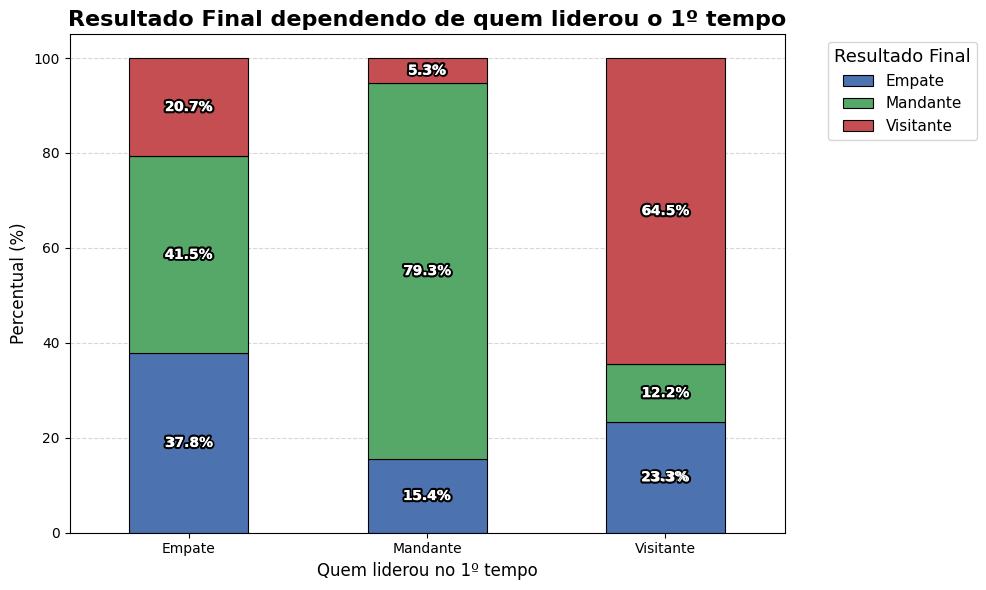

In [46]:
# Gráfico aplicado com princípios de design visual

# Percentual de resultados finais por quem liderou no 1º tempo
tabela = pd.crosstab(df_validos['lider_1_tempo'], df_validos['vencedor'], normalize='index') * 100

# Cores
cores = ['#4c72b0',  # Azul escuro → Mandante
         '#55a868',  # Verde → Empate
         '#c44e52']  # Vermelho suave → Visitante

# Criar figura
fig, ax = plt.subplots(figsize=(10,6))

# Plot de barras empilhadas
tabela.plot(kind='bar', stacked=True, ax=ax, color=cores, edgecolor='black', linewidth=0.8)

# Título e labels
ax.set_title('Resultado Final dependendo de quem liderou o 1º tempo', fontsize=16, weight='bold')
ax.set_xlabel('Quem liderou no 1º tempo', fontsize=12)
ax.set_ylabel('Percentual (%)', fontsize=12)

# Legenda
ax.legend(title='Resultado Final', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11, title_fontsize=13)

# deixar só linhas horizontais leves
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# Rotação dos rótulos do eixo x
plt.xticks(rotation=0)

# Adicionar valores dentro das barras com contorno mais grosso
for i, row in enumerate(tabela.values):
    bottom = 0
    for value in row:
        if value > 0:
            txt = ax.text(i, bottom + value/2, f'{value:.1f}%', ha='center', va='center',
                          color='white', fontweight='bold', fontsize=10)
            # Contorno preto mais grosso
            txt.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'),  # Aumentado
                                  path_effects.Normal()])
        bottom += value

# Adicionar valores dentro das barras com contraste e legibilidade
for i, row in enumerate(tabela.values):
    bottom = 0
    for value in row:
        if value > 0:  # só colocar texto se houver valor
            ax.text(i, bottom + value/2, f'{value:.1f}%', ha='center', va='center',
                    color='white', fontweight='bold', fontsize=10)
        bottom += value

plt.tight_layout()
plt.show()



Interpretação no contexto prático:

Quem lidera no primeiro tempo geralmente mantém vantagem até o final. Impacto do primeiro tempo é grande, sendo um forte indicador do resultado final. Quando há um empate no primeiro tempo é mais incerto, mas ainda favorece um pouco o mandante. Sendo assim, a vantagem de fazer mais gols no primeiro tempo é clara, independentemente do mando de campo.